## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

## Datos

## Exploración de los datos

## Procesado de datos

Nuestro target es la columna `Price_in_euros`

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

### 2. Dividir X_train, X_test, y_train, y_test

### 3. Baseline de modelos


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


 ## 2. Replicar el procesado para ``test.csv``

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [1]:
# ¿Qué opináis?
# ¿Sí, no?

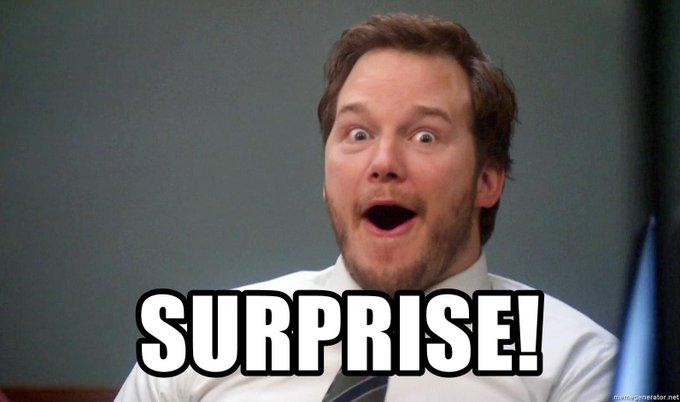

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [2]:
import numpy as np
import pandas as pd
import urllib.request

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from PIL import Image
from xgboost import XGBRegressor

In [3]:
# Cargar los datos
train_df = pd.read_csv("./data/train.csv", index_col=0)
test_df = pd.read_csv("./data/test.csv", index_col=0)
sample = pd.read_csv("./data/sample_submission.csv")


In [4]:
# Copiar datasets para preprocesamiento
df = train_df.copy()
test = test_df.copy()


In [5]:
# Convertir columnas a valores numéricos
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
test['ram_gb'] = test['Ram'].str.replace('GB', '').astype(int)

df['weight_kg'] = df['Weight'].str.replace('kg', '').astype(float)
test['weight_kg'] = test['Weight'].str.replace('kg', '').astype(float)

df['inches'] = df['Inches'].astype(float)
test['inches'] = test['Inches'].astype(float)


In [6]:
# Eliminar columnas originales
df.drop(columns=['Ram', 'Weight', 'Inches'], inplace=True)
test.drop(columns=['Ram', 'Weight', 'Inches'], inplace=True)


In [7]:
# Aplicar One-Hot Encoding a variables categóricas
categorical_columns = ['Company', 'TypeName', 'OpSys', 'Product', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
test_encoded = pd.get_dummies(test, columns=categorical_columns, drop_first=True)


In [8]:
# Asegurar que test_encoded tenga las mismas columnas que df_encoded
missing_cols = set(df_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Agregar columnas faltantes en test con valores 0

test_encoded = test_encoded[df_encoded.columns.drop('Price_in_euros', errors='ignore')]



C:\Users\conch\AppData\Local\Temp\ipykernel_14804\3040024638.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[col] = 0  # Agregar columnas faltantes en test con valores 0
C:\Users\conch\AppData\Local\Temp\ipykernel_14804\3040024638.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[col] = 0  # Agregar columnas faltantes en test con valores 0
C:\Users\conch\AppData\Local\Temp\ipykernel_14804\3040024638.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

In [9]:
# Separar variables
X = df_encoded.drop(columns=['Price_in_euros'])
y = df_encoded['Price_in_euros']


In [10]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Crear modelos base
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
svr_model = SVR(C=1.0, epsilon=0.1, kernel='rbf')


In [12]:
# Modelo de meta-aprendizaje
meta_model = LinearRegression()


In [13]:
# Crear el modelo de Stacking Regressor
stacking_model = StackingRegressor(estimators=[('rf', rf_model), ('gb', gb_model), ('svr', svr_model)], final_estimator=meta_model)
stacking_model.fit(X_train, y_train)


StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=20,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(learning_rate=0.05,
                                                         max_depth=5,
                                                         n_estimators=200,
                                                         random_state=42)),
                              ('svr', SVR())],
                  final_estimator=LinearRegression())

In [14]:
# Realizar predicciones en el conjunto de prueba
stacking_predictions = stacking_model.predict(X_test)


In [15]:
# Calcular el RMSE
stacking_mse = mean_squared_error(y_test, stacking_predictions)
stacking_rmse = np.sqrt(stacking_mse)
print(f'Stacking Regression RMSE: {stacking_rmse}')


Stacking Regression RMSE: 328.07755175113647


In [16]:
# Generar predicciones para test.csv
test_predictions = stacking_model.predict(test_encoded)


In [17]:
# Crear dataframe de submission
submission = pd.DataFrame({'laptop_ID': test.index, 'Price_in_euros': test_predictions})

# Guardar en CSV
submission.to_csv("submission.csv", index=False)

In [18]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

chequeador(submission)

You're ready to submit!
